In [7]:
from matplotlib.pyplot import boxplot
import pandas as pd

data = pd.read_csv('/home/otavio/ml/datasets/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
import matplotlib.pyplot as plt

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data = data.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    object 
 3   Sex       714 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     714 non-null    int64  
 6   Parch     714 non-null    int64  
 7   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 50.2+ KB


In [ ]:
count = data['Pclass'].value_counts()

fig2, ax2 = plt.subplots()
ax2.pie(count.values, labels=data.Pclass.unique(), autopct='%1.1f%%')

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie([data['Sex'].value_counts()['male'], data['Sex'].value_counts()['female']], labels=['Male', 'Female'])

In [ ]:
plt.hist(data['Age'])

In [ ]:
plt.hist(data['Fare'], bins='scott')

In [12]:
corr = data.corr()
corr['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.268189
Parch       0.093317
SibSp      -0.017358
Age        -0.077221
Pclass     -0.359653
Name: Survived, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Survived', 'Fare', 'Age', 'Pclass']

scatter_matrix(data[attributes], figsize=(12, 8))

In [13]:
from sklearn.preprocessing import LabelEncoder

embarked = data['Sex']
le = LabelEncoder()
encoded = le.fit_transform(embarked)
data['Sex'] = encoded

In [14]:
train_set = data.drop('Survived', axis = 1)
train_set = train_set.drop('Name', axis=1)
labels = data['Survived'].copy()

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_set, labels, cv=3, scoring="accuracy")

array([0.6092437 , 0.74789916, 0.75210084])

In [19]:
import numpy as np
from sklearn.base import BaseEstimator

class RamdomClassifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
rc = RamdomClassifier()

cross_val_score(rc, train_set, labels, cv=3, scoring="accuracy")

array([0.63445378, 0.53781513, 0.6092437 ])

In [20]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd_clf, train_set, labels, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(labels, y_pred)

array([[314, 110],
       [102, 188]])

In [23]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(labels, y_pred), recall_score(labels, y_pred))

0.6308724832214765 0.6482758620689655


In [25]:
y_scores = cross_val_predict(sgd_clf, train_set, labels, cv=3, method="decision_function")

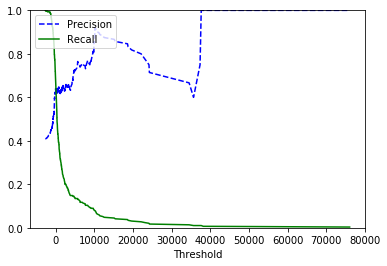

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(labels, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()



In [31]:
high_precicion = (y_scores > 10000)

print(precision_score(labels, high_precicion), recall_score(labels, high_precicion))

0.8518518518518519 0.07931034482758621


In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(train_set, labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
rfc_predict = rfc.predict(train_set)

print(precision_score(labels, rfc_predict), recall_score(labels, rfc_predict))

0.9929577464788732 0.9724137931034482


In [35]:
confusion_matrix(labels, rfc_predict)

array([[422,   2],
       [  8, 282]])

In [37]:
train_set.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')